### Лабораторная работа 4

In [48]:
import numpy as np

np.set_printoptions(suppress=True)

1. Реализуйте 1 шаг градиентного спуска для случая с несколькими выходами. Используйте возможности numpy для работы с векторами и матрицами.

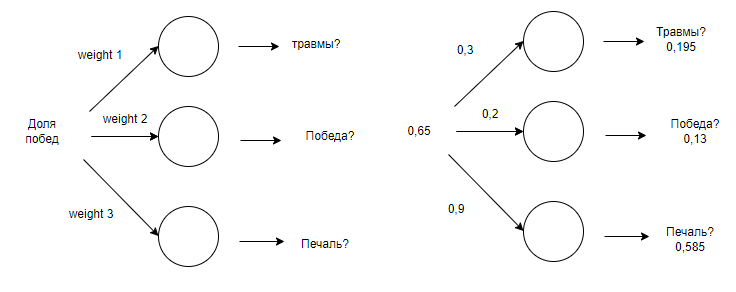

In [11]:
weights = [0.3, 0.2, 0.9]

def ele_mul(number, vector):
    output = [0, 0, 0]
    assert len(output) == len(vector)
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output

def neural_network(input, weights):
    pred = ele_mul(input, weights)
    return pred

wins = [0.65, 1.0, 1.0, 0.9]  # доля побед в предыдущих играх

hurt = [0.1, 0.0, 0.0, 0.1]  # вероятность травмы
win = [1, 1, 0, 1]  # вероятность победы
sad = [0.1, 0.0, 0.1, 0.2]  # вероятность грусти

input = wins[0]
goal_pred = np.array([hurt[0], win[0], sad[0]])

pred = neural_network(input, weights)
pred = np.array(pred)
print(f'Pred = {pred}')

weights = np.array(weights)
weight_corrections = np.zeros((len(weights,)))

# derivative = 2 * (pred - goal_pred) * input
learning_rate = 0.1

for i in range(1):
    derivative = 2.0 * (pred - goal_pred) * input
    weight_corrections[:] = derivative
    weights = weights - learning_rate * weight_corrections


Pred = [0.195 0.13  0.585]


In [12]:
print(
    "Weights:" + str(weights)
)  # Weights:[0.28764999999999996, 0.31310000000000004, 0.83695]


print(
    "Weight corrections:" + str(weight_corrections)
)  # Weight corrections:[0.12350000000000001, -1.131, 0.6305000000000002]

Weights:[0.28765 0.3131  0.83695]
Weight corrections:[ 0.1235 -1.131   0.6305]


2. Реализуйте 1 шаг градиентного спуска для примера с несколькими входами и выходами. Используйте возможности numpy для работы с векторами и матрицами.

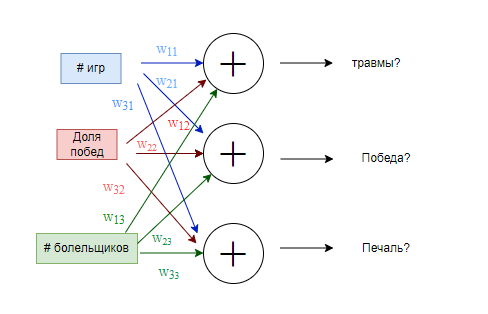

In [49]:
# games %wins #fans
weights = [[0.1, 0.1, -0.3], [0.1, 0.2, 0.0], [0.0, 1.3, 0.1]]  # hurt?  # win?  # sad?

def w_sum(a, b):
    assert len(a) == len(b)
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

def vect_mat_mul(vect, matrix):
    assert len(vect) == len(matrix)
    output = [0, 0, 0]
    for i in range(len(vect)):
        output[i] = w_sum(vect, matrix[i])
    return output

def neural_network(input, weights):
    pred = vect_mat_mul(input, weights)
    return pred

games = [8.5, 9.5, 9.9, 9.0]
wins = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt = [0.1, 0.0, 0.0, 0.1]
win = [1, 1, 0, 1]
sad = [0.1, 0.0, 0.1, 0.2]

learning_rate = 0.01

input = [games[0], wins[0], nfans[0]]
goal_pred = [hurt[0], win[0], sad[0]]

pred = neural_network(input, weights)
print(f'Pred = {pred}')

weights = np.array(weights)
input = np.array(input)
pred = np.array(pred)
goal_pred = np.array(goal_pred)

for i in range(1):
    errors = input @ weights.T - goal_pred
    grads = 2.0 * (errors[:, None] @ input[:, None].T)
    weights = weights - learning_rate * grads

Pred = [0.555, 0.9800000000000001, 0.9650000000000001]


In [50]:
weights  # [[0.02264999999999999, 0.094085, -0.31092],
#  [0.10339999999999999, 0.20026000000000002, 0.00047999999999999774],
#   [-0.14705000000000001, 1.288755, 0.07924]]

array([[ 0.02265 ,  0.094085, -0.31092 ],
       [ 0.1034  ,  0.20026 ,  0.00048 ],
       [-0.14705 ,  1.288755,  0.07924 ]])